In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import seaborn as sns


# Import API key
from config import g_key

In [2]:
# Files to Load (Remember to Change These)
fast_food_restaurants_2018 = "../Resources/Fast_Food_Restaurants_2018.csv"
census_2018 ="../Resources/census_data_clean_2018.csv"
# Read files into Pandas DF
Rest_2018 = pd.read_csv(fast_food_restaurants_2018)
census_2018=pd.read_csv(census_2018)

In [3]:
# remove columns we will not need
Rest_2018=Rest_2018.drop(['id','sourceURLs','websites'], axis =1)
Rest_2018.columns

Index(['dateAdded', 'dateUpdated', 'address', 'categories', 'city', 'country',
       'keys', 'latitude', 'longitude', 'name', 'postalCode', 'province'],
      dtype='object')

In [4]:
# reorganize/rename columns
Rest_2018 = Rest_2018.rename(columns={'name':'Name', 'address': 'Address', 'city': 'City', 'country': 'Country', 'latitude': 'Latitude', 'longitude':'Longitude', 'postalCode': 'Zip Code',\
                                     'province': 'State'})
Rest_2018 = Rest_2018[['Name', 'Address', 'City','State', 'Zip Code','Country', 'Latitude', 'Longitude']]
Rest_2018.head()

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude
0,SONIC Drive In,800 N Canal Blvd,Thibodaux,LA,70301,US,29.814697,-90.814742
1,SONIC Drive In,800 N Canal Blvd,Thibodaux,LA,70301,US,29.814697,-90.814742
2,Taco Bell,206 Wears Valley Rd,Pigeon Forge,TN,37863,US,35.803788,-83.580553
3,Arby's,3652 Parkway,Pigeon Forge,TN,37863,US,35.782339,-83.551408
4,Steak 'n Shake,2118 Mt Zion Parkway,Morrow,GA,30260,US,33.562738,-84.321143


In [5]:
# get unique names in list and sort alphabetically to assist with cleaning
names = Rest_2018['Name'].unique()
names.sort()
print(len(names))
print(names)

571
['7-Eleven' '90 Miles Cuban Cafe' 'A&W/Long John Silvers'
 "A's Ace Burgers" 'Abruzzi Pizza' 'Acropolis Gyro Palace'
 'Adobe Cantina Salsa' 'Ak Buffet' 'All About Burger'
 'Ameci Pizza & Pasta' "Andy's Frozen Custard" "Angelina's Pizza"
 "Ani's Chicken" "Arby's" "Arby's - Closed" 'Arbys' 'Arctic Circle'
 "Arni's Crawfordsville" "Arthur Treacher's Fish & Chips" 'Au Bon Pain'
 "Auntie Anne's" "Auntie Anne's Pretzels" 'Ay Jalisco' 'B Good'
 'B&D Burgers' "B's Pizza" 'B.GOOD' 'BURGERFI' 'Back Yard Burgers'
 'Backyard Grill' "Bad Daddy's Burger Bar" 'Baja Fresh Mexican Grill'
 "Baker's Drive Thru" "Baker's Drive-thru" 'Band Box Diner' 'Barberitos'
 "Barro's Pizza" 'Baskin-Robbins' 'Batter Up' 'BeanThru' 'Beef Villa'
 "Bell's Pizza" 'Belleria Pizzeria' "Ben & Jerry's" "Ben and Jerry's"
 "Bennidito's Pizza" 'Best Gyros' 'Big House Burgers' 'Big Island Pizza'
 'Bistro To Go' 'Blackies Hotdog Stand' 'Blackjack Pizza'
 "Blake's Lotaburger" 'Blimpie' 'Blue Coast Burrito' 'Boardwalk Grill'
 'B

In [6]:
# Rename all locations that have different spelling, punctuation etc
Rest_2018['Name'] = Rest_2018['Name'].replace({"Arby's - Closed":"Arby's",'Arbys': "Arby's", "Auntie Anne's": "Auntie Anne's Pretzels","Baker's Drive Thru":"Baker's Drive-thru","Ben and Jerry's": "Ben & Jerry's",'Bob Evans Restaurant':'Bob Evans',"Bojangles' Famous Chicken 'n Biscuits": 'Bojangles', 'Burger King¬Æ': 'Burger King','Capri Italian Restaurant':'Capri Restaurant',"Carl's Jr.":"Carl's Jr","Carl's Jr. / Green Burrito":"Carl's Jr","Carl's Jr / Green Burrito":"Carl's Jr",'Caseys Carry Out Pizza':"Casey's General Store","Charley's Grilled Subs":'Charleys Philly Steaks',"Checker's Pizza":'Checkers','Chick-fil-A':'Chick-Fil-A', 'Chipotle':'Chipotle Mexican Grill','Dairy Queen (Treat Only)':'Dairy Queen','Dunkin Donuts':"Dunkin' Donuts",'Five Guys Burgers Fries':'Five Guys', 'Five Guys Burgers And Fries':'Five Guys',"Foster's Freeze":'Fosters Freeze', "Hardee's":'Hardees',"Hardee's / Red Burrito":'Hardees', "Hardee's/red Burrito":'Hardees','Jack in the Box':'Jack In The Box', 'Jack in the Box -':'Jack In The Box'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Jimmy John's":'Jimmy Johns','KFC - Kentucky Fried Chicken':'KFC','KFC/AW':'KFC','KFC/Long John Silvers':'KFC', 'KFC/Taco Bell':'KFC'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Little Caesar's Pizza":'Little Caesars', 'Little Caesars Pizza':'Little Caesars',"Long John Silver's / AW" 'Long John Silvers':"Long John Silver's",'Long John Silvers / A&W':"Long John Silver's",'Mc Donalds':"McDonald's","McDonald's of Rolesville":"McDonald's",'McDonalds':"McDonald's","McDonalds's":"McDonald's","Mcdonald's":"McDonald's",'Mcdonalds':"McDonald's",'Mcdonalds Whitehouse':"McDonald's"})
Rest_2018['Name'] = Rest_2018['Name'].replace({'Panda Express Innovation Kitchen':'Panda Express' ,'PepperJax Grill':'Pepperjax Grill',"Popeye's Louisiana Kitchen":'Popeyes','Popeyes Chicken & Biscuits':'Popeyes','Popeyes Chicken Biscuits':'Popeyes','Popeyes Louisiana Kitchen':'Popeyes'})
Rest_2018['Name'] = Rest_2018['Name'].replace({'QDOBA Mexican Eats':'Qdoba Mexican Grill', 'Qdoba Mexican Eats':'Qdoba Mexican Grill', "Quizno's": 'Quiznos', 'Quiznos Sub':'Quiznos',"Raising Cane's":'Raising Canes', "Raising Cane's Chicken Fingers":'Raising Canes'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Rally's Hamburgers":"Rally's", 'Rallys':"Rally's",'Roma Pizza':'Romas Pizza','SONIC Drive In': 'SONIC Drive-In', 'SUBWAY¬Æ':'SUBWAY'})
Rest_2018['Name'] = Rest_2018['Name'].replace({'Sonic':'SONIC Drive-In', "Sonic America's Drive-In":'SONIC Drive-In','Sonic Drive In':'SONIC Drive-In','Sonic Drive in':'SONIC Drive-In','Sonic Drive-In':'SONIC Drive-In',"Steak 'n Shake":'Steak N Shake','Taco Bell / KFC':'Taco Bell' ,'Taco Bell/KFC':'Taco Bell','Taco Bell/Pizza Hut':'Taco Bell'})
Rest_2018['Name'] = Rest_2018['Name'].replace({ 'Wienerschitzel':'Wienerschnitzel','Wingstop Restaurant':'Wingstop',"Wolf's Dairy Queen" :'Dairy Queen',"Zaxby's Chicken Fingers & Buffalo Wings": "Zaxby's",'b.good':'B.GOOD', 'A&W/Long John Silvers':"Long John Silver's"})
# After going through team decided to rename Pizza Hut, Taco Bell and KFC to YUM Brands
Rest_2018['Name'] = Rest_2018['Name'].replace({'Pizza Hut': 'YUM Brands', 'KFC': 'YUM Brands','Taco Bell': 'YUM Brands'})

In [7]:
# Remove locations that are not food related 'Walmart Supercenter''T-Mobile''Hilton Boston Logan Airport''7-Eleven'
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames= Rest_2018[(Rest_2018['Name']=='Walmart Supercenter')].index
Rest_2018.drop(indexNames, inplace=True)

In [8]:
indexNames= Rest_2018[(Rest_2018['Name']=='T-Mobile')].index
Rest_2018.drop(indexNames, inplace=True)

In [9]:
indexNames= Rest_2018[(Rest_2018['Name']=='Hilton Boston Logan Airport')].index
Rest_2018.drop(indexNames, inplace=True)

In [10]:
indexNames= Rest_2018[(Rest_2018['Name']=='7-Eleven')].index
Rest_2018.drop(indexNames, inplace=True)
print(len(Rest_2018))
Rest_2018['Name'].nunique()

9977


491

In [11]:
# find number of entries for each location
Rest_2018['Name'].value_counts()

McDonald's                      1953
YUM Brands                      1442
Burger King                      834
Subway                           776
Arby's                           669
                                ... 
Christo's Original                 1
Boardwalk Grill                    1
Boddie Noell Enterprises Inc       1
Kasa's Pizza                       1
Beef Villa                         1
Name: Name, Length: 491, dtype: int64

In [12]:
# Remove all locations that have less than 50 entries
# https://www.thetopsites.net/article/58467286.shtml
threshold = 50
clean_rest_2018 = Rest_2018[Rest_2018.groupby('Name')['Name'].transform('count')>threshold].copy()
print(len(clean_rest_2018))
clean_rest_2018['Name'].value_counts()

8526


McDonald's         1953
YUM Brands         1442
Burger King         834
Subway              776
Arby's              669
Wendy's             628
Jack In The Box     332
Chick-Fil-A         228
Dairy Queen         220
Domino's Pizza      215
SONIC Drive-In      205
Carl's Jr           130
Jimmy Johns         121
Hardees             104
Krystal              82
Panera Bread         76
Dunkin' Donuts       76
SUBWAY               73
Culver's             71
Del Taco             66
Panda Express        62
Steak N Shake        56
In-N-Out Burger      54
Taco John's          53
Name: Name, dtype: int64

In [13]:
clean_rest_2018.to_csv('../Resources/clean_rest_2018.csv', encoding='utf-8', index = False)
clean_rest_2018.head(2)

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude
0,SONIC Drive-In,800 N Canal Blvd,Thibodaux,LA,70301,US,29.814697,-90.814742
1,SONIC Drive-In,800 N Canal Blvd,Thibodaux,LA,70301,US,29.814697,-90.814742


In [14]:
# combine with chipotle csv
# first read get file then read into pandas DF
Chipotle_stores = "../Resources/chipotle_stores.csv"
chipotle = pd.read_csv(Chipotle_stores)
chipotle.head(2)

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756


In [15]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
combine= [chipotle,clean_rest_2018]
all_rest_df = pd.concat(combine, axis=0)
all_rest_df.tail()

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude
9995,YUM Brands,3460 Robinhood Rd,Winston-Salem,NC,27106,US,36.117563,-80.316553
9996,YUM Brands,3069 Kernersville Rd,Winston-Salem,NC,27107,US,36.077718,-80.176748
9997,YUM Brands,838 S Main St,Kernersville,NC,27284,US,36.111015,-80.089165
9998,YUM Brands,1702 Glendale Dr SW,Wilson,NC,27893,US,35.719981,-77.945795
9999,YUM Brands,1405 W Broad St,Elizabethtown,NC,28337,US,34.632778,-78.624615


In [16]:
# Add census data to right of all rest data
# https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
all_rest_df = pd.merge(all_rest_df,census_2018[['Longitude','Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']], on="Longitude", how='right')
all_rest_df

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Chipotle Mexican Grill,2655 Richmond Ave Ste P05 Staten Island,Island,New York,10314,US,40.581662,-74.16773,2640.0,50.0,96250.0,41608.0,354.0,13.409091
1,Arby's,245 N Mt Juliet Rd,Mount Juliet,TN,37122,US,36.174747,-86.51260,902.0,33.8,-666666666.0,20524.0,216.0,23.946785
2,Arby's,35 E 96th St,Indianapolis,IN,46240,US,39.926617,-86.15644,11147.0,38.9,86869.0,36633.0,372.0,3.337221
3,YUM Brands,3400 E 1st St,Los Angeles,CA,90063,US,34.036870,-118.19490,95103.0,31.6,50246.0,17174.0,17809.0,18.726013
4,Domino's Pizza,5830 9th Ave N,Saint Petersburg,FL,33710,US,27.780800,-82.71300,1112.0,42.5,38250.0,19920.0,205.0,18.435252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-132.82545,330.0,39.5,34028.0,18213.0,129.0,39.090909
32240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-133.07316,927.0,43.6,57375.0,25840.0,172.0,18.554477
32241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-131.56883,1635.0,34.5,53409.0,22453.0,235.0,14.373089
32242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-133.60689,38.0,55.5,-666666666.0,13658.0,28.0,73.684211


In [ ]:
# Also tried the below and got an empty dataframe:
# Add census data to right of all rest data
# https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
# https://data-flair.training/blogs/pandas-merge-and-join/
# all_rest_df = pd.merge(all_rest_df,census_2018, on=['Latitude', 'Longitude'])
# print(len(all_rest_df))
# all_rest_df

In [17]:
# export to csv
# all_rest_df.to_csv("../Resources/All_rest_2018.csv, index=False, header=True")

In [18]:
# wound up combinging via excel, could not get to combine without duplicate columns for address, city, etc. need to talk about at class

all_rest_df = "../Resources/All_rest_2018.csv"
all_rest_df = pd.read_csv(all_rest_df)
all_rest_df.head()

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Categories,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328,NaN,24509.0,23.7,27638.0,22390.0,9821.0,40.070994
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756,NaN,1715.0,27.7,41500.0,29812.0,655.0,38.192420
2,Chipotle Mexican Grill,3220 Morrow Rd,Birmingham,Alabama,35235,US,33.595581,-86.647437,NaN,20926.0,38.0,55609.0,25477.0,2829.0,13.519067
3,Chipotle Mexican Grill,4719 Highway 280,Birmingham,Alabama,35242,US,33.422582,-86.698279,NaN,55122.0,40.9,91966.0,51709.0,3641.0,6.605348
4,Chipotle Mexican Grill,1821 Cherokee Ave SW,Cullman,Alabama,35055,US,34.154134,-86.841220,NaN,20884.0,38.4,42252.0,23465.0,3202.0,15.332312


In [19]:
all_rest_df['Population'].describe()


count     11123.000000
mean      33185.782253
std       18376.080765
min          66.000000
25%       19706.000000
50%       30695.000000
75%       43647.500000
max      114989.000000
Name: Population, dtype: float64

In [20]:
print(len(all_rest_df))
all_rest_df.head()

11155


,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Categories,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328,NaN,24509.0,23.7,27638.0,22390.0,9821.0,40.070994
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756,NaN,1715.0,27.7,41500.0,29812.0,655.0,38.192420
2,Chipotle Mexican Grill,3220 Morrow Rd,Birmingham,Alabama,35235,US,33.595581,-86.647437,NaN,20926.0,38.0,55609.0,25477.0,2829.0,13.519067
3,Chipotle Mexican Grill,4719 Highway 280,Birmingham,Alabama,35242,US,33.422582,-86.698279,NaN,55122.0,40.9,91966.0,51709.0,3641.0,6.605348
4,Chipotle Mexican Grill,1821 Cherokee Ave SW,Cullman,Alabama,35055,US,34.154134,-86.841220,NaN,20884.0,38.4,42252.0,23465.0,3202.0,15.332312


In [21]:
print(len(census_2018))

32242


In [22]:
census_2018=census_2018.dropna(how='any')
print(len(census_2018))
census_2018.head(2)

32242


,Zipcode,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,601,18.180103,-66.74947,17242.0,40.5,13092.0,6999.0,10772.0,62.475351
1,602,18.363285,-67.18024,38442.0,42.3,16358.0,9277.0,19611.0,51.014515


In [23]:
# api_key = g_key
# single= requests.get("https://maps.googleapis.com/maps/api/geocode/json?key=" + api_key +"&components=postal_code:97403")
# single_response = single.json()

# print(json.dumps(single_response, indent=4, sort_keys=True))

In [24]:
# lat = single_response["results"][0]["geometry"]["location"]["lat"]
# lng = single_response["results"][0]["geometry"]["location"]["lng"]
# print(lat,lng)

Commented out the below cell, while i was able to get the correct call for the API(as above) i was not able to return any zipcodes. all went straight to Zip not found. I then found a dataset with the information and plugged it into our clean census data. https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/

In [25]:
# https://stackoverflow.com/questions/5585957/get-latlng-from-zip-code-google-maps-api
# Turn census zip codes into lat/long combinations for heatmap of US
# https://maps.googleapis.com/maps/api/geocode/json?key=YOUR_API_KEY&components=postal_code:97403
# Lat=[]
# Long=[]

# url = 'https://maps.googleapis.com/maps/api/geocode/json?key='
# api_key = g_key
# zipcode = census_2018['Zipcode']

# for zips in zipcode:
#     print(f'{url}{api_key}&components=postal_code:{zips}')
# #     try:
#         pop_request = requests.get(f'{url}{api_key}&components=postal_code:{zips}')
# # (url + api_key +'&components=postal_code:'+zips)
#         pop_response=pop_request.json()
#         Lat.append(pop_response["results"][0]["geometry"]["location"]["lat"])
#         Long.append(pop_response["results"][0]["geometry"]["location"]["lng"])
#         print(f'Success')
#     except IndexError:
#         print(f'Zip not found')

    


In [26]:
# configure gmaps with API key
gmaps.configure(api_key =g_key)

In [27]:
# Store lat/long into locations
locations = census_2018[['Latitude', 'Longitude']]

# Store humidity as weight
weight = census_2018['Population']

# Set Chipotle markers
chip_locations = chipotle[['Latitude', 'Longitude']]
# Set McDonalds markers
mcdon_locations = all_rest_df.loc[all_rest_df['Name']=='McDonald\'s'] 
mcdonlatlong=mcdon_locations[['Latitude', 'Longitude']]
# Set yum brand locations (Taco Bell, Pizza Hut and KFC)
taco_locations = all_rest_df.loc[all_rest_df['Name']=='Taco Bell']
tacolatlong=taco_locations[['Latitude', 'Longitude']]
pizza_locations = all_rest_df.loc[all_rest_df['Name']=='Pizza Hut']
pizzalatlong=pizza_locations[['Latitude', 'Longitude']]
kfc_locations = all_rest_df.loc[all_rest_df['Name']=='KFC']
kfclatlong=kfc_locations[['Latitude', 'Longitude']]

In [28]:
fig = gmaps.figure()

heat_layer=gmaps.heatmap_layer(locations, weight, dissipating=True, max_intensity=25, point_radius=2)

chip_layer = gmaps.symbol_layer(
    chip_locations, fill_color='black', stroke_color='black', scale=1)

taco_layer = gmaps.symbol_layer(
    tacolatlong, fill_color='green', stroke_color='green', scale=1)

pizza_layer = gmaps.symbol_layer(
    pizzalatlong, fill_color='green', stroke_color='green', scale=1)

kfc_layer = gmaps.symbol_layer(
    kfclatlong, fill_color='green', stroke_color='green', scale=1)

fig.add_layer(heat_layer)
fig.add_layer(chip_layer)
fig.add_layer(taco_layer)
fig.add_layer(pizza_layer)
fig.add_layer(kfc_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
# Set up binns for population on all_rest_df
bins = [0, 20000, 40000, 60000, 80000, 100000,120000]
group_names=['0-20K', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k']
all_rest_df['Zip Code Population Bins'] = pd.cut(all_rest_df['Population'], bins, labels = group_names, include_lowest =True)
all_rest_df['Zip Code Population Bins'].value_counts()


20k - 40k      4825
0-20K          2822
40k - 60k      2556
60k - 80k       726
80k - 100k      161
100k - 120k      33
Name: Zip Code Population Bins, dtype: int64

In [30]:
all_rest_pop = all_rest_df.groupby(['Name','Zip Code Population Bins'])
print(all_rest_pop['Zip Code Population Bins'].count())

Name        Zip Code Population Bins
Arby's      0-20K                       190
            20k - 40k                   294
            40k - 60k                   155
            60k - 80k                    23
            80k - 100k                    2
                                       ... 
YUM Brands  20k - 40k                   637
            40k - 60k                   328
            60k - 80k                    96
            80k - 100k                   18
            100k - 120k                   1
Name: Zip Code Population Bins, Length: 150, dtype: int64


In [31]:
chart_all_rest = all_rest_df.loc[(all_rest_df['Name']== 'Chipotle Mexican Grill')|(all_rest_df['Name']== 'YUM Brands')|(all_rest_df['Name']=='Burger King')|(all_rest_df['Name']=='McDonald\'s')]
chart_all_rest.head(2)

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Categories,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Zip Code Population Bins
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328,NaN,24509.0,23.7,27638.0,22390.0,9821.0,40.070994,20k - 40k
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756,NaN,1715.0,27.7,41500.0,29812.0,655.0,38.192420,0-20K


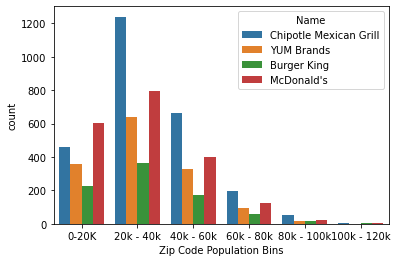

In [32]:
# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
sns_plot = sns.countplot(data=chart_all_rest,x='Zip Code Population Bins',hue='Name')
figure = sns_plot.get_figure()
figure.savefig('Population_Bins_and_Locations.png')
# sns_plot.savefig('Population_Bins_and_Locations.png')

In [33]:
census_2018['Population'].describe()

count     32242.000000
mean       9996.540506
std       14679.550998
min           5.000000
25%         770.000000
50%        2925.500000
75%       13597.500000
max      122814.000000
Name: Population, dtype: float64

In [34]:
bins = [0, 20000, 40000, 60000, 80000, 100000,120000]
group_names=['0-20K', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k']
census_2018['Zip Code Population Bins'] = pd.cut(census_2018['Population'], bins, labels = group_names, include_lowest =True)
census_2018['Zip Code Population Bins'].value_counts()

0-20K          26281
20k - 40k       4151
40k - 60k       1382
60k - 80k        337
80k - 100k        74
100k - 120k       16
Name: Zip Code Population Bins, dtype: int64

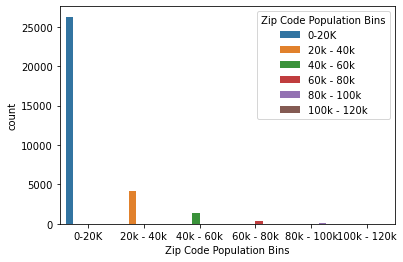

In [35]:
sns_plot = sns.countplot(data=census_2018,x='Zip Code Population Bins',hue='Zip Code Population Bins')
figure = sns_plot.get_figure()
figure.savefig('Census_Population_Bins_and_Locations.png')